In [37]:
%matplotlib inline
import random
import numpy as np
import torch
from d2l import torch as d2l

### 1.生成数据集

In [38]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [5]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [8]:
features.shape

torch.Size([1000, 2])

In [9]:
labels.shape

torch.Size([1000, 1])

In [10]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.2686, -0.8570]) 
label: tensor([6.5743])


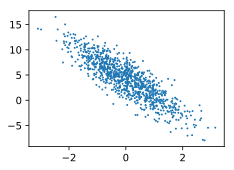

In [15]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);

### 2.读取数据集

In [25]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [26]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.1743,  1.0799],
        [-1.9179,  1.7613],
        [-0.7442, -0.9661],
        [ 1.1931,  0.1246],
        [ 1.7336, -0.5460],
        [-1.7994, -0.4443],
        [ 0.6220,  0.2101],
        [ 1.0149, -0.6979],
        [-0.6619,  0.8822],
        [ 0.2540,  0.9551]]) 
 tensor([[ 0.1885],
        [-5.6262],
        [ 5.9958],
        [ 6.1933],
        [ 9.5242],
        [ 2.1243],
        [ 4.7277],
        [ 8.6075],
        [-0.1258],
        [ 1.4644]])


### 3.初始化模型参数

In [27]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

### 4.定义模型

In [28]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

### 5.定义损失函数

In [29]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### 6.定义优化算法

In [30]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### 7.训练

In [31]:
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.037675
epoch 2, loss 0.000144
epoch 3, loss 0.000055
epoch 4, loss 0.000054
epoch 5, loss 0.000054
epoch 6, loss 0.000054
epoch 7, loss 0.000054
epoch 8, loss 0.000054
epoch 9, loss 0.000054
epoch 10, loss 0.000054


In [35]:
true_w

tensor([ 2.0000, -3.4000])

In [36]:
true_b

4.2

In [33]:
w.reshape(true_w.shape)

tensor([ 2.0002, -3.4003], grad_fn=<ViewBackward>)

In [34]:
b

tensor([4.1996], requires_grad=True)

In [32]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-0.0002,  0.0003], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0004], grad_fn=<RsubBackward1>)
